In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('car data Regularization.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [37]:
import seaborn as sns

C:\Users\ravik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


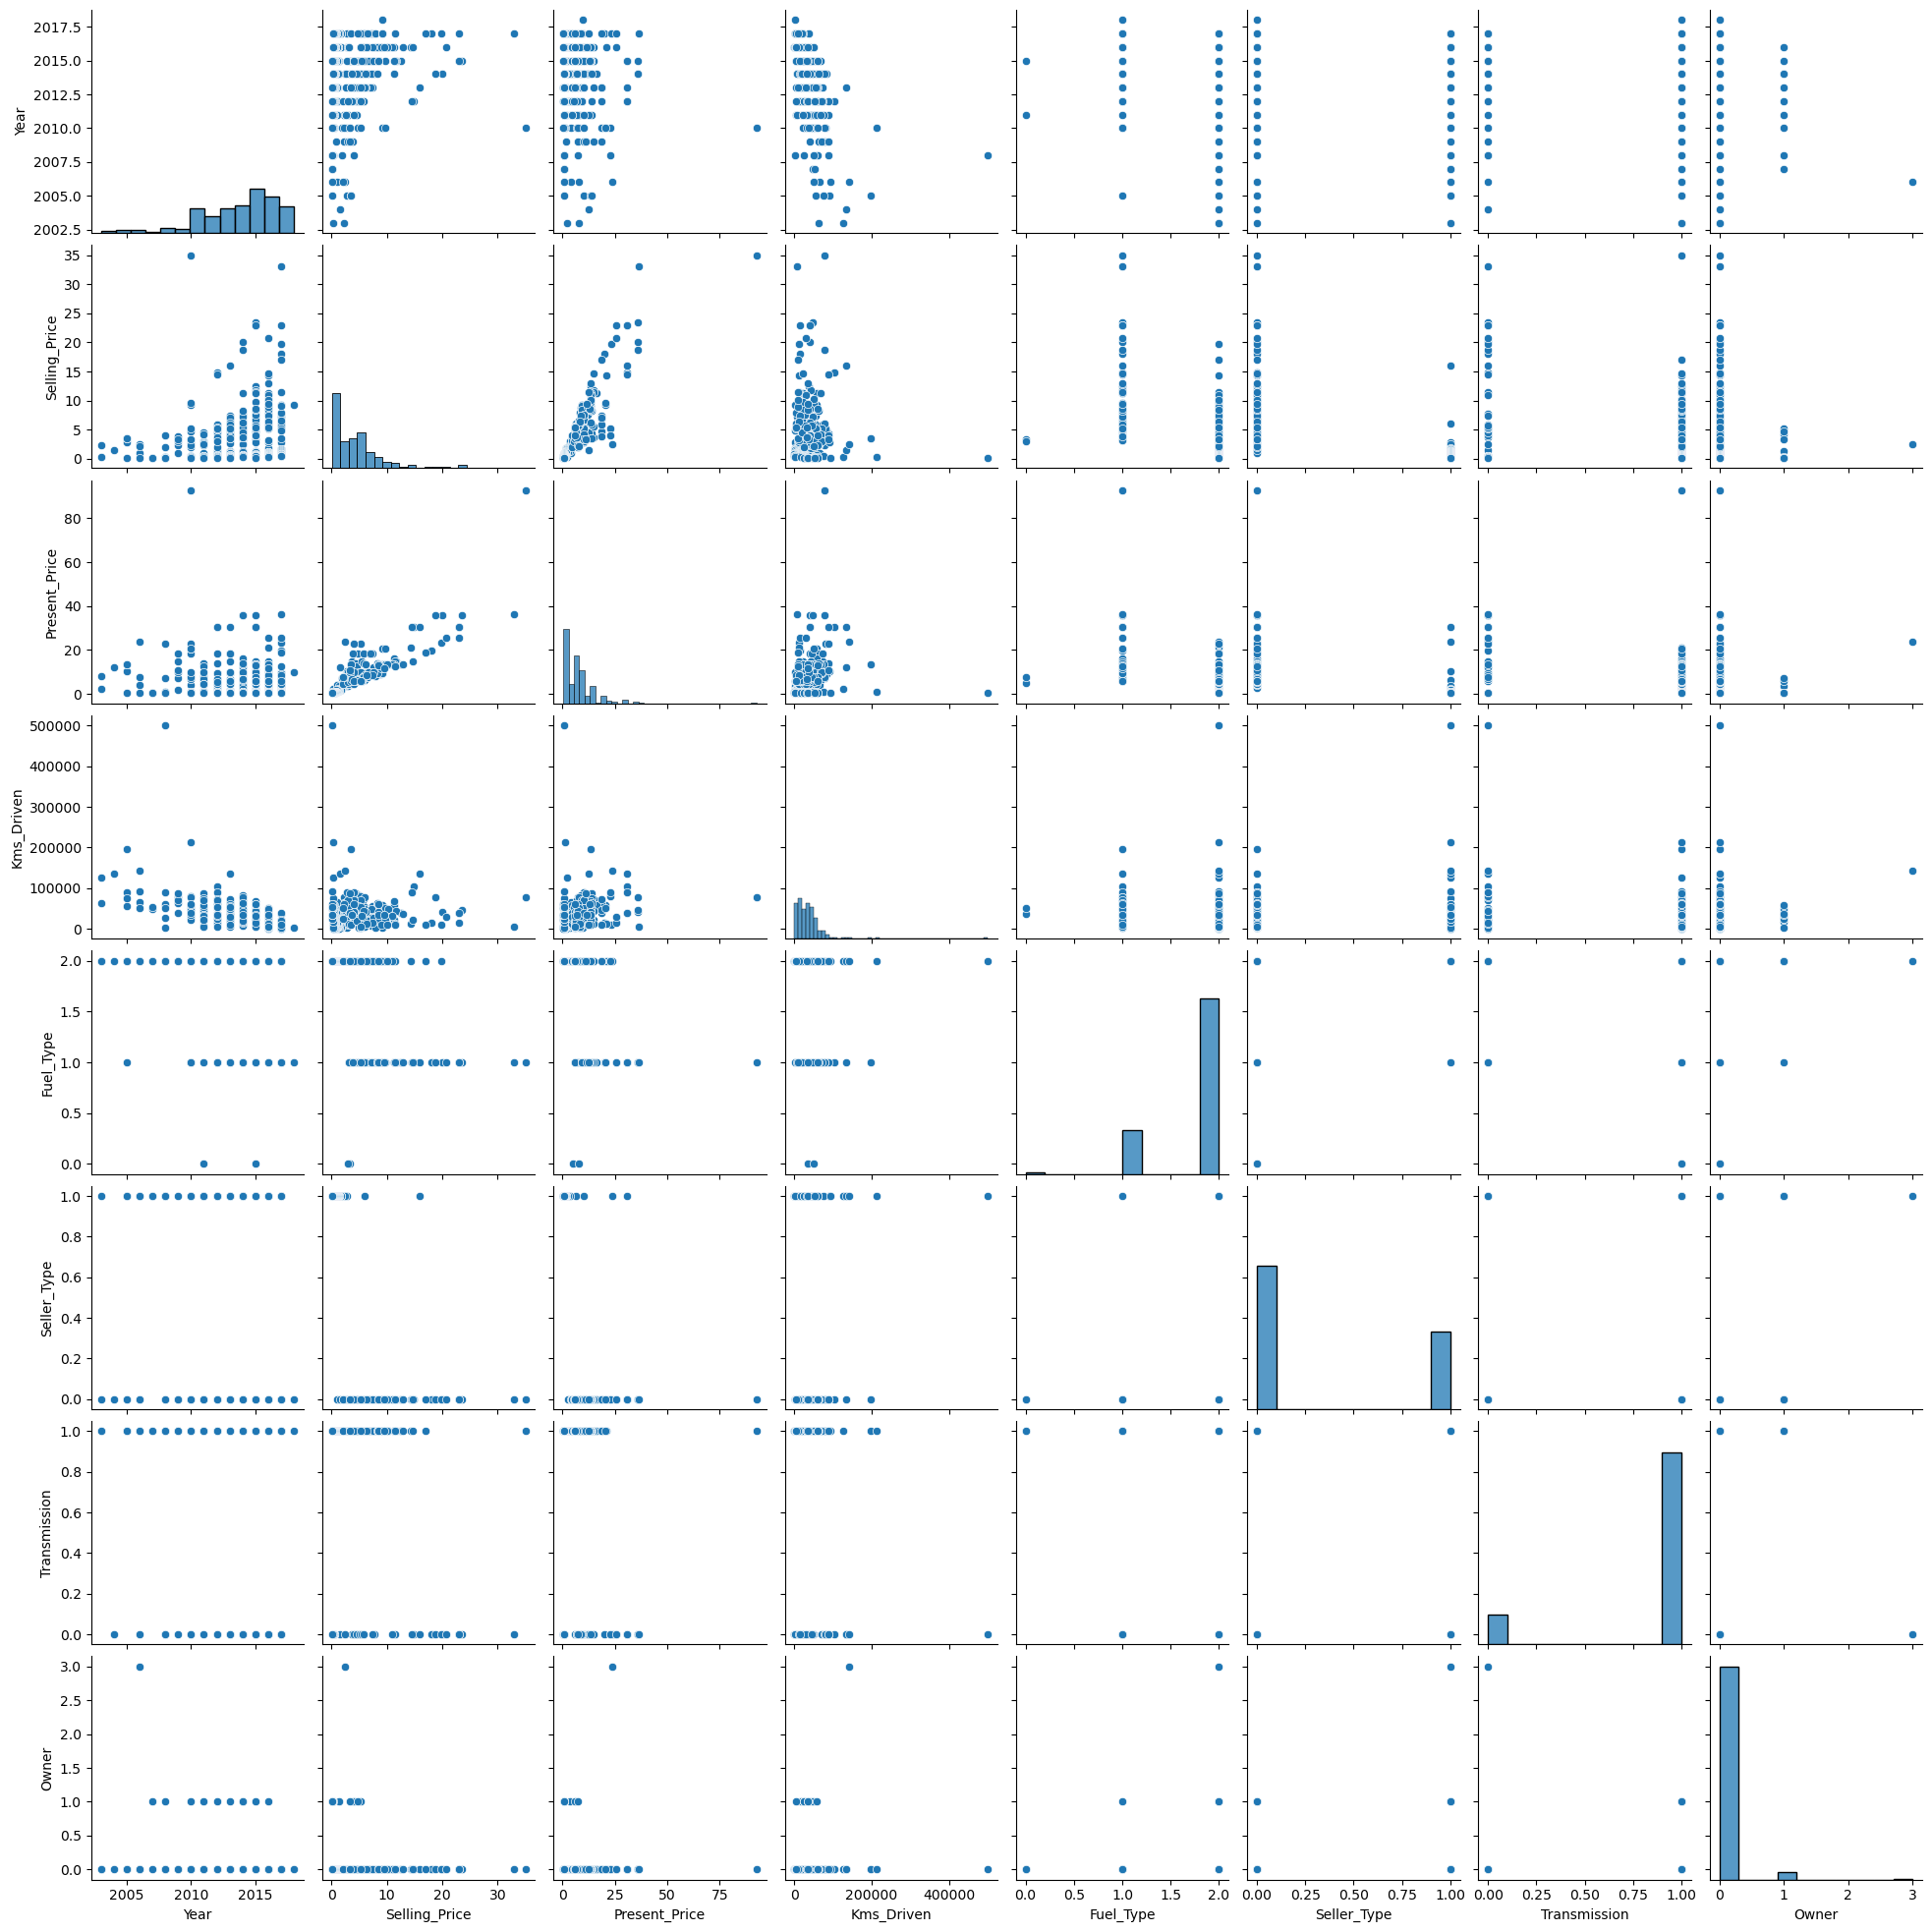

In [38]:
# Pairplot for numerical variables
sns.pairplot(df)
plt.show()

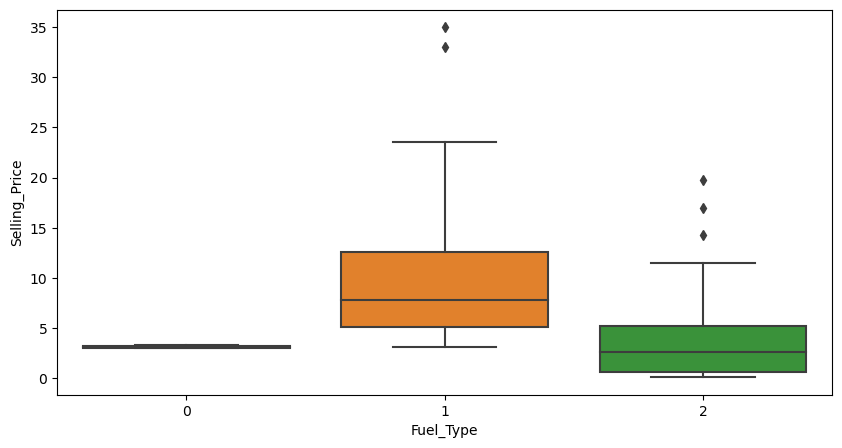

In [41]:
# Boxplot for Selling Price vs Fuel Type
plt.figure(figsize = (10,5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.show()

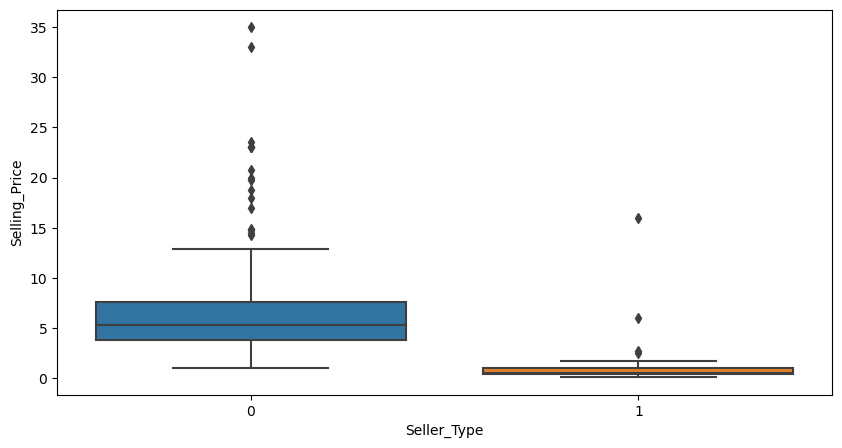

In [42]:

# Boxplot for Selling Price vs Seller Type
plt.figure(figsize = (10,5))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.show()

In [8]:
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = label_encoder.fit_transform(df['Seller_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

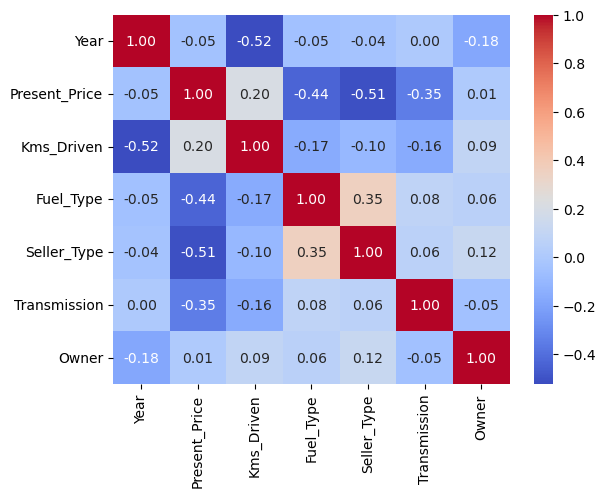

In [44]:
# Correlation Heatmap
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [9]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [10]:
x = df.drop(['Car_Name','Selling_Price'],axis = 'columns')
y = df['Selling_Price']

In [11]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [12]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [13]:
#train test
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3, random_state = 42)

In [14]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

y_pred = model_linear.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

In [15]:
print(f'mean sqaured error: {mse_linear} r2 Score: {r2_linear}')

mean sqaured error: 3.4932860262269534 r2 Score: 0.8773175030337901


In [24]:
#Ridge
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(x_train, y_train)

y_ridge_pred = model_ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test,y_ridge_pred)
r2_ridge = r2_score(y_test,y_ridge_pred)
print(f'mean squared error Ridge: {mse_ridge} r2 score: {r2_ridge}')

mean squared error Ridge: 3.4891566249090498 r2 score: 0.8774625255887291


In [17]:
#Lasso
model_lasso = Lasso(alpha = 1.0)
model_lasso.fit(x_train, y_train)

y_lasso_pred = model_lasso.predict(x_test)

mse_lasso = mean_squared_error(y_test , y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print(f'mean squared error: {mse_lasso} r2 lasso: {r2_lasso}')

mean squared error: 4.5666949748316705 r2 lasso: 0.8396199056735947


In [18]:
#ElasticNet
model_en = ElasticNet(alpha = 1.0)
model_en.fit(x_train, y_train)

y_en_pred = model_en.predict(x_test)

mse_en = mean_squared_error(y_test , y_en_pred)
r2_en = r2_score(y_test, y_en_pred)

print(f'mean squared error ElasticNet: {mse_en} r2 Score ElasticNet: {r2_en}')

mean squared error ElasticNet: 4.384330944872787 r2 Score ElasticNet: 0.8460244412267115


In [76]:
# Getting Feature Importance
feature_importance_linear = model_linear.coef_

print("Feature Importance (Linear Regression):")
print(dict(zip(x.columns, feature_importance_linear)))

#Getting Feature Importance Ridge
feature_importance_ridge = model_ridge.coef_

print("Feature Importance (Ridge Regression):")
print(dict(zip(x.columns,feature_importance_ridge)))
 
#Getting Feature Importance Ridge
feature_importance_Lasso = model_lasso.coef_

print(f'feature_Importance (Lasso):')
print(dict(zip(x.columns, feature_importance_Lasso)))

#Getting Feature Importance ElasticNet
feature_importance_elasticnet = model_en.coef_

print(f'feature_importance (elasticnet)')
print(dict(zip(x.columns, feature_importance_elasticnet)))


Feature Importance (Linear Regression):
{'Year': 0.36977639048347954, 'Present_Price': 0.429060407028538, 'Kms_Driven': -3.78391047754005e-06, 'Fuel_Type': -1.4473484349134276, 'Seller_Type': -1.1311281833175366, 'Transmission': -1.4417608569568643, 'Owner': -1.0475166231384854}
Feature Importance (Ridge Regression):
{'Year': 0.3728647760170748, 'Present_Price': 0.4312167146291126, 'Kms_Driven': -3.596556810747806e-06, 'Fuel_Type': -1.4059724685998194, 'Seller_Type': -1.1033328098718058, 'Transmission': -1.3538601148450842, 'Owner': -0.9863123652818252}
feature_Importance (Lasso):
{'Year': 0.3019114357602281, 'Present_Price': 0.4860086307509185, 'Kms_Driven': -4.175880335210556e-06, 'Fuel_Type': -0.0, 'Seller_Type': -0.0, 'Transmission': -0.0, 'Owner': -0.0}
feature_importance (elasticnet)
{'Year': 0.35330036665651554, 'Present_Price': 0.48859642565075273, 'Kms_Driven': -2.577647689966327e-06, 'Fuel_Type': -0.0, 'Seller_Type': -0.0, 'Transmission': -0.0, 'Owner': -0.0}


In [77]:
# Compare models based on Sum of Squared Error
model_errors = {'Linear_Regression': mse_linear,
               'Ridge_Regression': mse_ridge,
               'Lasso_Regression': mse_lasso,
               'ElasticNet': mse_en}
best_model = min(model_errors, key = model_errors.get)

In [78]:
print(f"Best Model: {best_model}, Sum of Squared Error: {model_errors[best_model]}")

Best Model: Ridge_Regression, Sum of Squared Error: 3.4891566249090498


In [79]:
# Check if Sum of Squared Error metric for the best model < 5000
if model_errors[best_model] < 5000:
    print(f"Success! Sum of Squared Error of the best model ({best_model}) is less than 5000.")
else:
    print(f"Sum of Squared Error of the best model ({best_model}) is greater than or equal to 5000. Consider further analysis or model improvement.")

Success! Sum of Squared Error of the best model (Ridge_Regression) is less than 5000.


In [80]:
model_errors_r2 = {'Linear_regression': r2_linear,
                  'Ridge_regression': r2_ridge,
                  'Lasso_regression': r2_lasso,
                  'ElasticNet': r2_en}
best_model_r2 = max(model_errors_r2, key = model_errors_r2.get)


In [81]:
print(f"Best model R2: {best_model_r2}, R2 score: {model_errors_r2[best_model_r2]}")

Best model R2: Ridge_regression, R2 score: 0.8774625255887291


In [62]:
if model_errors_r2[best_model_r2] > 0.8:
    print(f"Success! R2 score of the best model ({best_model_r2}) is greater than 0.8.")
else:
     print(f"R2 score of the best model ({best_model}) is greater than or equal to 0.8. Consider further analysis or model improvement.")
        
    

Success! R2 score of the best model (Ridge_regression) is greater than 0.8.
